<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jihidalgor/blob/main/ActividadSemana7_DataAnalysisWithPython_A01794221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC4029 - Ciencia y analítica de datos.**

**Semana 7 - Data Analysis with Python (IBM).**

**Módulo 4 - Model Development.**


Alumno: Jorge Iván Hidalgo Reyes.

*Matrícula: A01794221.*


Profesora: María de la Paz Rico Fernández.

Fecha: Octubre 27, 2022.

En este módulo se estudió sobre:

* Regresión lineal simple/múltiple.
* Evaluación del modelo mediante la visualización.
* Regresión polinómica y pipelines.
* R-cuadrado y MSE para la evaluación en la muestra.
* Predicción y toma de decisiones.

Un modelo o estimador puede considerarse como una ecuación matemática utilizada para predecir un valor dado uno o más valores. el objetivo es relacionar una o varias variables o características independientes con las variables dependientes.

Normalmente, cuantos más datos relevantes se tengan, más preciso será el modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [74]:
df.shape

(201, 29)

# **Linear and Multiple Linear Regression.**

La *regresión lineal* se refiere a una variable independiente para hacer una predicción. La *regresión lineal múltiple* se refiere a múltiples variables independientes para hacer una predicción.

La **regresión lineal simple** (o SLR por sus siglas en inglés) es un método que nos ayuda a entender la relación entre dos variables: La variable predictora (independiente) **x**, y la variable objetivo (dependiente) **y**.

$\hat{y} = b_{0} + b_{1}x$

$b_{0}$ es la ordenada al origen.

$b_{1}$ es la pendiente. 

Para ajustar un modelo lineal simple, primero definimos la variable predictora y la variable objetivo, posteriormente, utilizamos la función fit() para ajustar el modelo y finalmente, obtenremos una predicción con la función predict().

La **regresión lineal múltiple** se utiliza para explicar la relación entre una variable continua objetivo (**y**), y dos o más variables predictoras (**X**).

$\hat{y} = b_0 + b_1x_1 + b_2x_2 + … + b_{k}x_{k}$

$b_{0}$ es la ordenada al origen.

$b_{1}$ es el coeficiente de $x_{1}$. 

$b_{2}$ es el coeficiente de $x_{2}$ y así, sucesivamente. 

>> # Linear Regression.

In [3]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression()

In [7]:
X = df[['highway-mpg']]
Y = df['price']

In [8]:
lm.fit(X,Y)

LinearRegression()

In [75]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [11]:
lm.intercept_

38423.3058581574

In [12]:
lm.coef_

array([-821.73337832])

**Pregunta 1.a**

In [15]:
lm1 = LinearRegression()

**Pregunta 1.b**

In [16]:
X = df[['engine-size']]
Y = df [['price']]
lm1.fit(X,Y)

LinearRegression()

**Pregunta 1.c**

In [19]:
lm1.coef_

array([[166.86001569]])

In [20]:
lm1.intercept_

array([-7963.33890628])

**Pregunta 1.d**

In [21]:
Yest = -7963.34 + 166.86*X

>> # Multiple Linear Regression.



In [22]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [23]:
lm.fit(Z, df['price'])

LinearRegression()

In [24]:
lm.intercept_

-15806.62462632922

In [25]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

**Pregunta 2.a**

In [26]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

**Pregunta 2.b**

In [27]:
lm2.coef_

array([   1.49789586, -820.45434016])

# **Model Evaluation using Visualization.**

¿Por qué utilizar *regression plot*?

Nos proporciona una buena estimación de:

* La relación entre dos variables.
* La intensidad de la correlación.
* La dirección de la relación (positiva o negativa).

El eje horizontal corresponde a la variable independiente y el eje vertical a la variable dependiente.

El "*residual plot*" representa el error entre los valores reales y los estimados.

Se puede emplear la librería "*seaborn*" para crear un "*residual plot*" mediante la función *residplot()*. El primer parámetro que recibe es una seire de la variable independiente o característica, mientras que el segundo parámetro es una serie de la variable dependiente u objetivo.

Un "*distribution plot*" cuenta los valores estimados versus los valores reales. Este gráfico son muy útiles para visualizar modelos que tiene más de una variable independiente.


In [28]:
import seaborn as sns
%matplotlib inline 

>> # Regression Plot.

Visualización de "highway-mpg" como una potencial variable predictora del precio:

(0.0, 48175.91219270947)

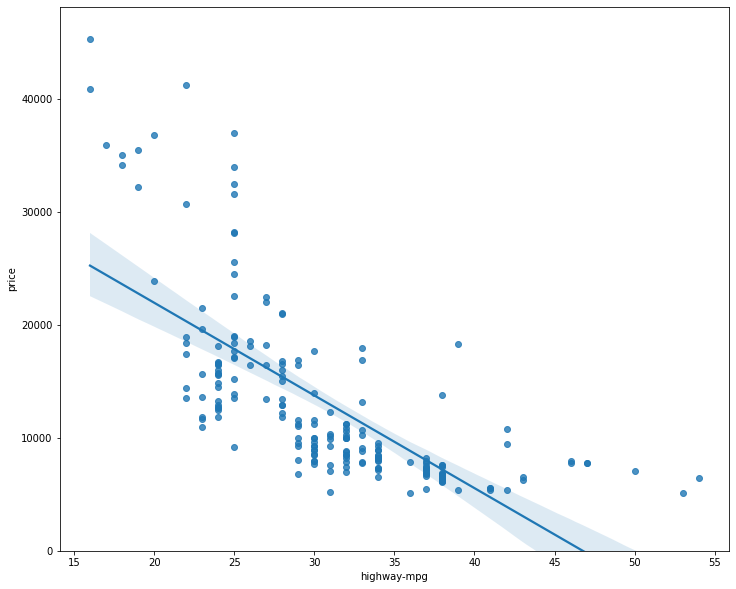

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

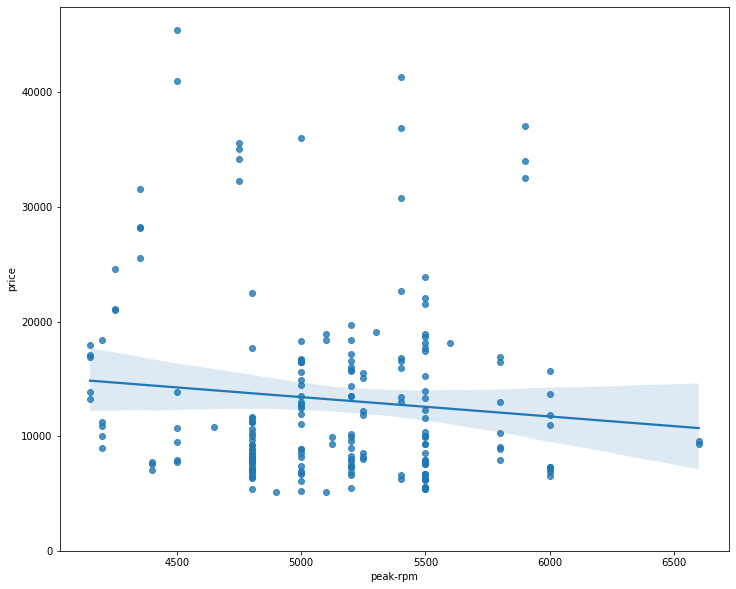

In [30]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

**Pregunta 3.**

In [31]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


>> # Residual Plot.

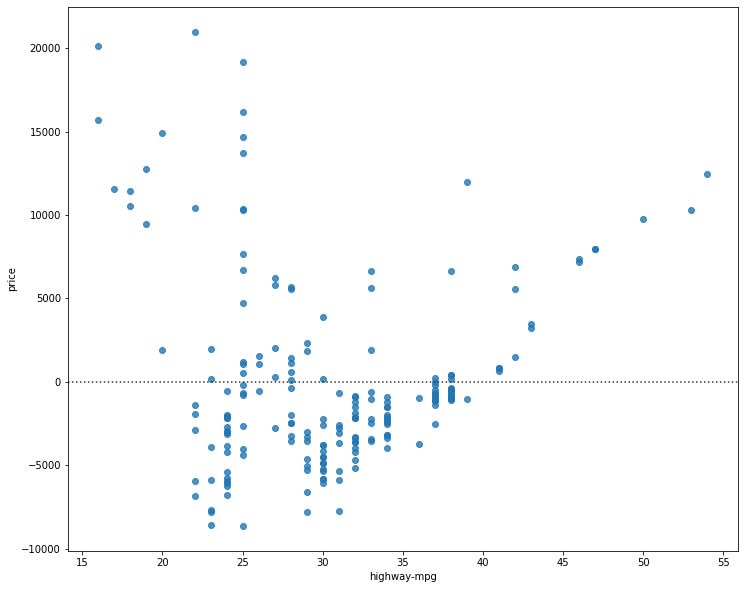

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

>> # Distribution plot. 

In [33]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


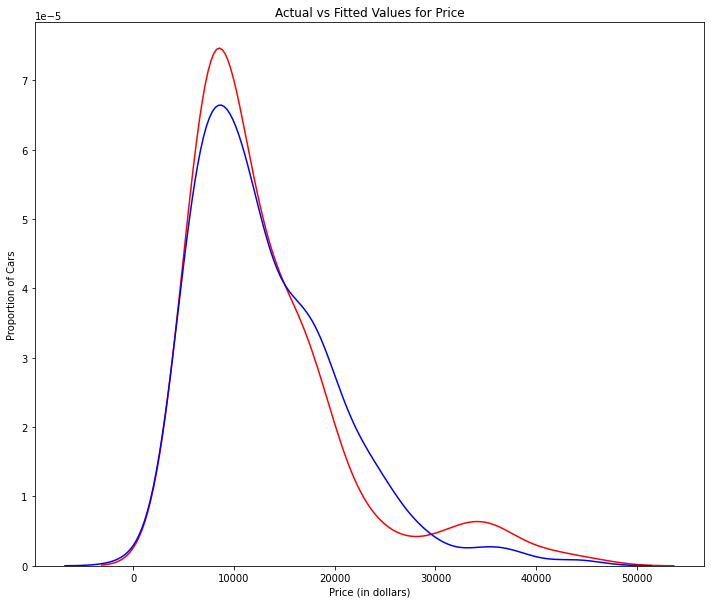

In [39]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# **Polynomial Regression and Pipelines.**

La regresión polinomial es un caso especial de la regresión lineal general. Este método es de mucho beneficio para describir relaciones curvilíneas.

El grado de la regresión marca una gran diferencia y puede dar lugar a un mejor ajuste si se elige
el valor correcto.

En Python, lo hacemos mediante la función *polyfit()*.

Los "*Pipelines*" realizan secuencialmente una serie de transformaciones. Primero importamos todos los módulos que necesitamos, luego importamos la librería Pipeline. Creamos una lista de tuplas, el primer elemento de la tupla contiene el nombre del estimador
modelo, el segundo elemento contiene el constructor del modelo. Y finalmente, introducimos la lista en el constructor de la tubería.

In [40]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [41]:
x = df['highway-mpg']
y = df['price']

In [42]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


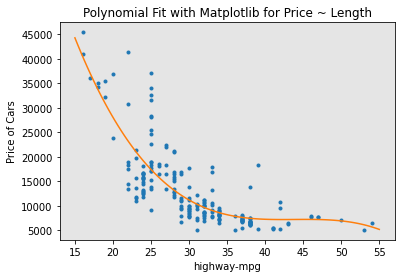

In [43]:
PlotPolly(p, x, y, 'highway-mpg')

In [44]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

**Pregunta 4.**

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


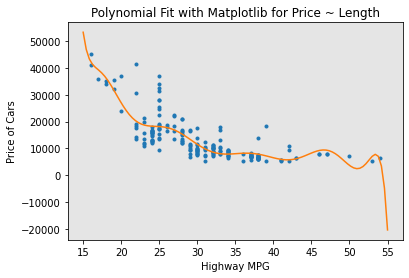

In [45]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [48]:
Z_pr=pr.fit_transform(Z)

In [49]:
Z.shape

(201, 4)

In [50]:
Z_pr.shape

(201, 15)

>> # Pipeline.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [53]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

**Pregunta 5.**

In [56]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# **Measures for In-Sample Evaluation.**

Dos métricas importantes que se utilizan para determinar el ajuste de un modelo son el error cuadrático medio (MSE) y R-cuadrado. Para medir el MSE, encontramos la diferencia entre el valor real y y el valor predicho y que luego se eleva al cuadrado. Luego, elevamos el número al cuadrado y finalmente tomamos la media o el promedio de todos los errores sumándolos todos y dividiendo por el número de muestras.

Para encontrar el MSE en Python, podemos importar el "*mean_squared_error*()" de "*scikit-learn.metrics*". La función "*mean_Squared_error()*" recibe dos entradas: el valor real de la variable objetivo
y el valor estimado de la variable objetivo.

El $R^2$ también se llama coeficiente de determinación. Es una medida para determinar
que tan cerca están los datos de la línea de regresión ajustada. 

$R^2 = 1 - \frac{MSE \, de \, la \, línea \, de \, regresión}{MSE \, del \, promedio \, de \, los \, datos}$

Toma valores entre 0 y 1.

>> # Modelo 1: Regresión lineal simple.

In [57]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [58]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


>> # Modelo 2: Regresión lineal múltiple.

In [61]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [62]:
Y_predict_multifit = lm.predict(Z)

In [63]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


>> # Modelo 3: Ajuste polinomial.

In [64]:
from sklearn.metrics import r2_score

In [65]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


>> # MSE.

In [66]:
mean_squared_error(df['price'], p(x))

20474146.426361218

# **Prediction and Decision Making.**

¿Cómo podemos determinar si nuestro modelo es correcto?

Lo primero es asegurarse de que los resultados del modelo tienen sentido. Siempre se debe utilizar la visualización, las métricas numéricas para la evaluación y la comparación entre los diferentes modelos.

A veces su modelo producirá valores que no tienen sentido.

Para generar una secuencia de valores en un rango especificado, importa *Numpy*, luego usa la función "*arrange*" de Numpy para generar la secuencia. El primer parámetro es el punto inicial de la secuencia.
El segundo parámetro es el punto final más uno de la secuencia. El último parámetro es el tamaño del paso entre los elementos de la secuencia.

El MSE de un modelo MLR será menor que el MSE de un modelo SLR, ya que los errores de los datos disminuirán cuando se incluyan más variables en el modelo. La regresión polinomial también tendrá un MSE menor que la regresión normal.

In [67]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [68]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [69]:
lm.fit(X, Y)
lm

LinearRegression()

In [70]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

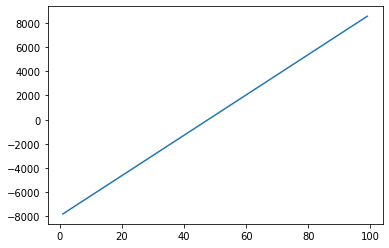

In [71]:
plt.plot(new_input, yhat)
plt.show()

Ahora que se tiene la visualización de los diferentes modelos y se han generado los valores de $R^2$ y MSE para los modelos, ¿Cómo determinamos un buen ajuste del modelo?

*¿Qué es un buen valor de $R^2$?*

> Al comparar modelos, el modelo con el valor R-cuadrado más alto es el que mejor se ajusta a los datos.

*¿Qué es un buen MSE?*

> Al comparar modelos, el modelo con el menor valor de MSE es el que mejor se ajusta a los datos.



**SLR vs MLR.**

Normalmente, cuantas más variables se tengan, mejor será el modelo de predicción. Sin embargo, esto no siempre es cierto. A veces puede que no tenga suficientes datos, que se encuentre con problemas numéricos o que muchas de las variables no sean útiles e incluso actúen como ruido. Por ello, siempre hay que comprobar el MSE y el $R^2$.

Para comparar los resultados de los modelos MLR frente a SLR, nos tenemos que fijar en una combinación de $R^2$ y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.

El MSE de SLR es de 3,16x10^7 mientras que MLR tiene un MSE de 1,2 x10^7. El MSE de MLR es mucho menor.

$R^2$: En este caso, también se puede ver que hay una gran diferencia entre el $R^2$ del SLR y el $R^2$ del MLR. El $R^2$ del SLR (0.497) es muy pequeño comparado con el $R^2$ del MLR (0.809).

Esta métrica de $R^2$ en combinación con el MSE muestran que la MLR parece el mejor ajuste del modelo en este caso en comparación con la SLR.

**SLR vs Ajuste polinomial.**

* MSE: Podemos ver que el ajuste polinómico redujo el MSE, ya que este MSE es menor que el del SLR.
* R-cuadrado: El R-cuadrado del ajuste polinómico es mayor que el R-cuadrado del SLR, por lo que el ajuste polinómico también aumentó bastante el R-cuadrado.

Dado que el ajuste polinómico dio lugar a un menor MSE y un mayor R-cuadrado, podemos concluir que este fue un modelo de mejor ajuste que la simple regresión lineal para predecir el "precio" con "carretera-mpg" como variable de predicción.

**MLR vs Ajuste polinomial.**

* El MSE de la MLR es menor que el MSE del ajuste polinómico.
* El $R^2$ de la MLR es también mucho mayor que el del ajuste polinómico.

En conclusión, el modelo MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son potenciales predictores del precio final del coche.

# **Graded Review Questions.**

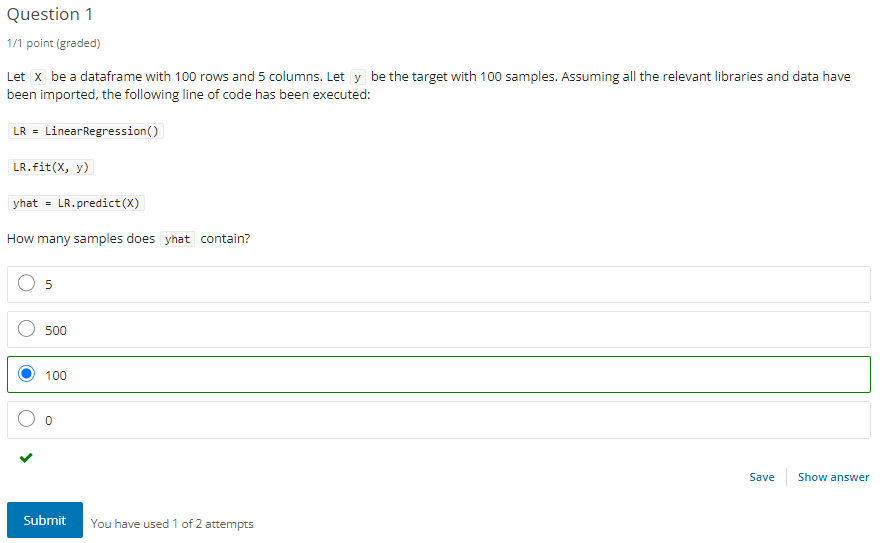

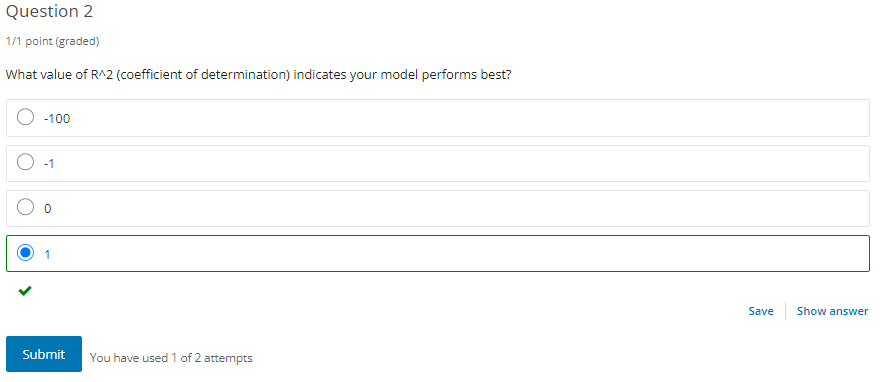

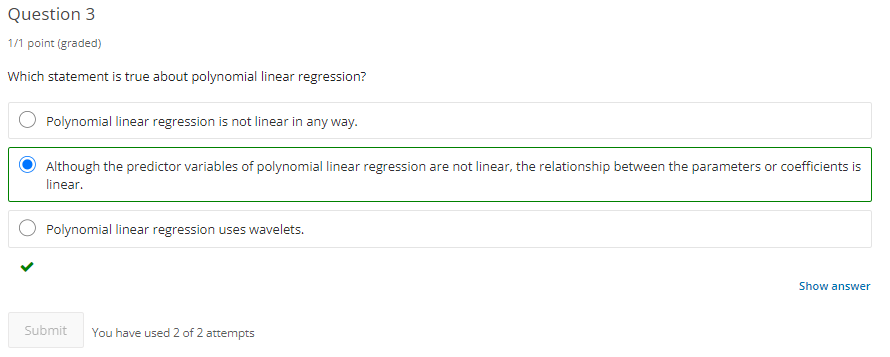

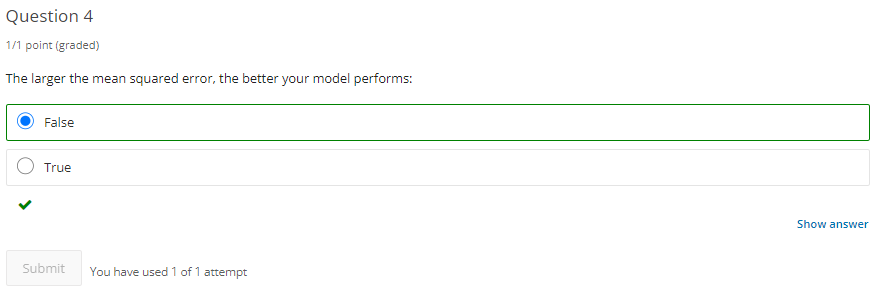

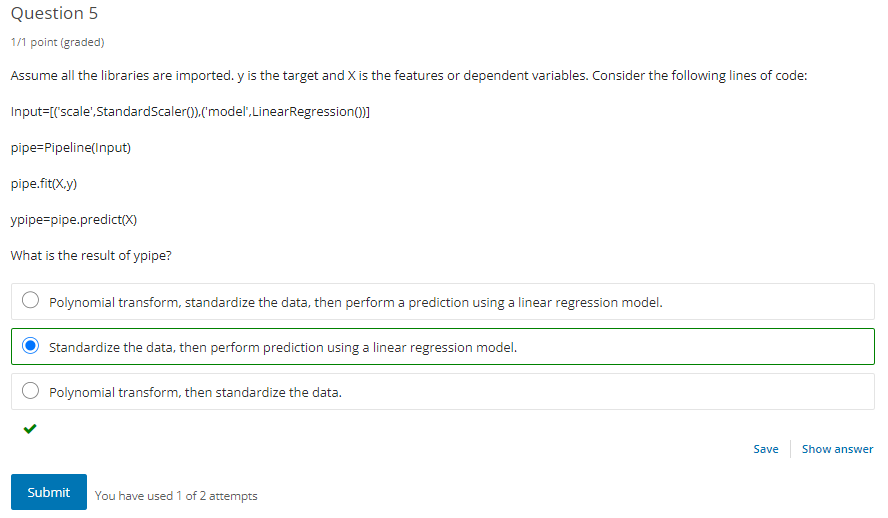

# Progreso en el curso.

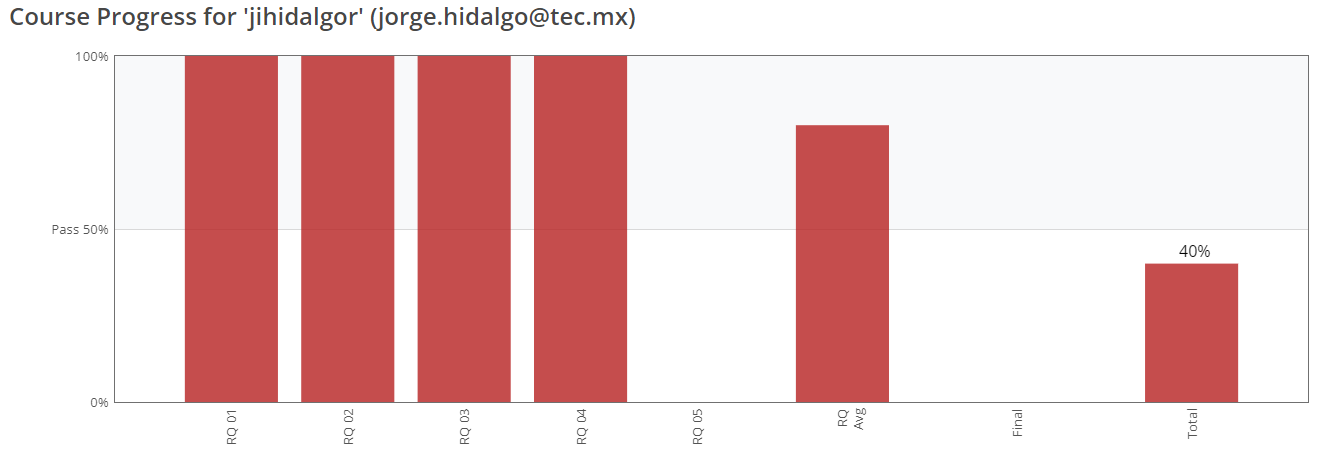